# ⚙️ Maintenance Prédictive - FleetOpti AI

Ce notebook analyse les données de maintenance pour identifier les patterns menant à des pannes et valider le modèle de classification.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Ajouter le dossier src au path
sys.path.append(os.path.abspath('../src'))
from preprocessing import load_maintenance_data

# Configuration style
plt.style.use('ggplot')
sns.set_palette("viridis")

## 1. Chargement et Exploration (Via Preprocessing Propre)
Nous utilisons la fonction `load_maintenance_data` qui gère déjà l'encodage et les dates.

In [3]:
DATA_PATH = '../data/vehicle_maintenance_data.csv'
df, _ = load_maintenance_data(DATA_PATH)
print(f"Dimensions du dataset : {df.shape}")
df.head()

Dimensions du dataset : (50000, 20)


,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance,Days_Since_Service
0,4,58765,1,0,4,1,0,2000,28524,2025-06-24,1,20782,6,3,13.622204,1,1,2,1,807
1,5,60353,0,1,7,1,0,2500,133630,2025-06-04,1,23489,7,0,13.625307,1,1,2,1,870
2,0,68072,2,0,2,1,0,1500,34022,2025-04-27,0,17979,7,0,14.306302,1,0,2,1,956
3,0,60849,0,4,5,2,0,2500,81636,2025-11-05,1,6220,7,3,18.709467,1,2,1,1,898
4,0,45742,2,5,1,2,1,2000,97162,2025-09-14,2,16446,6,2,16.977482,0,0,2,1,989


## 2. Analyse de la cible : Besoin de Maintenance

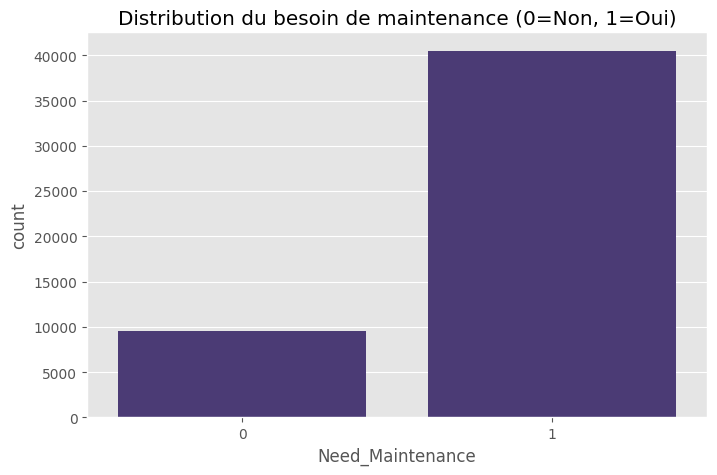

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Need_Maintenance', data=df)
plt.title('Distribution du besoin de maintenance (0=Non, 1=Oui)')
plt.show()

## 3. Impact du Kilométrage et de l'Âge

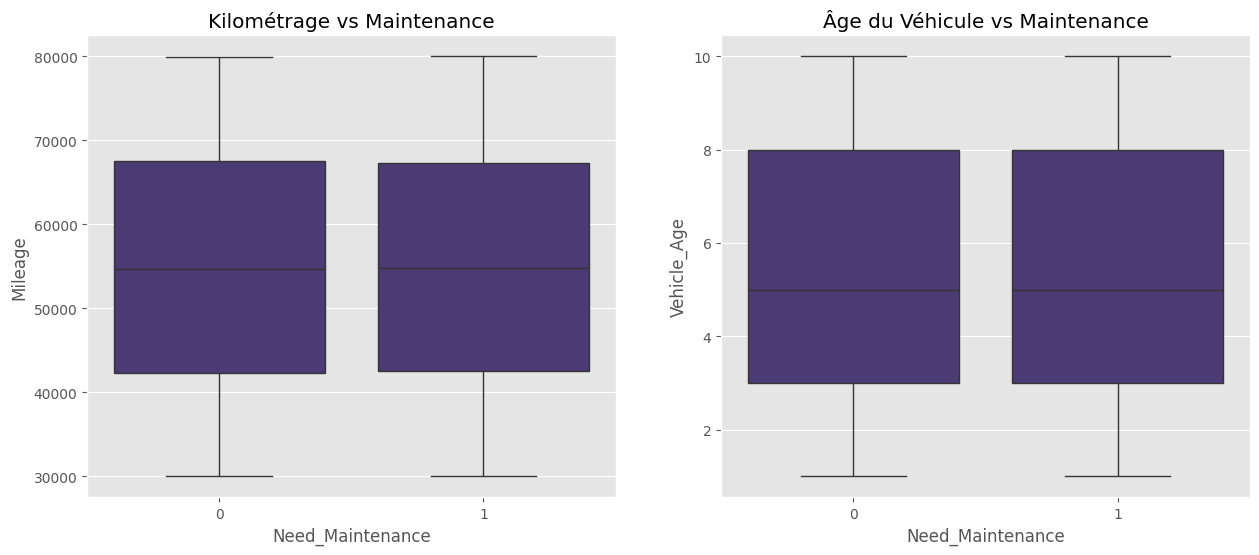

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Need_Maintenance', y='Mileage', data=df, ax=ax[0])
ax[0].set_title('Kilométrage vs Maintenance')

sns.boxplot(x='Need_Maintenance', y='Vehicle_Age', data=df, ax=ax[1])
ax[1].set_title('Âge du Véhicule vs Maintenance')

plt.show()

## 4. Corrélation des variables

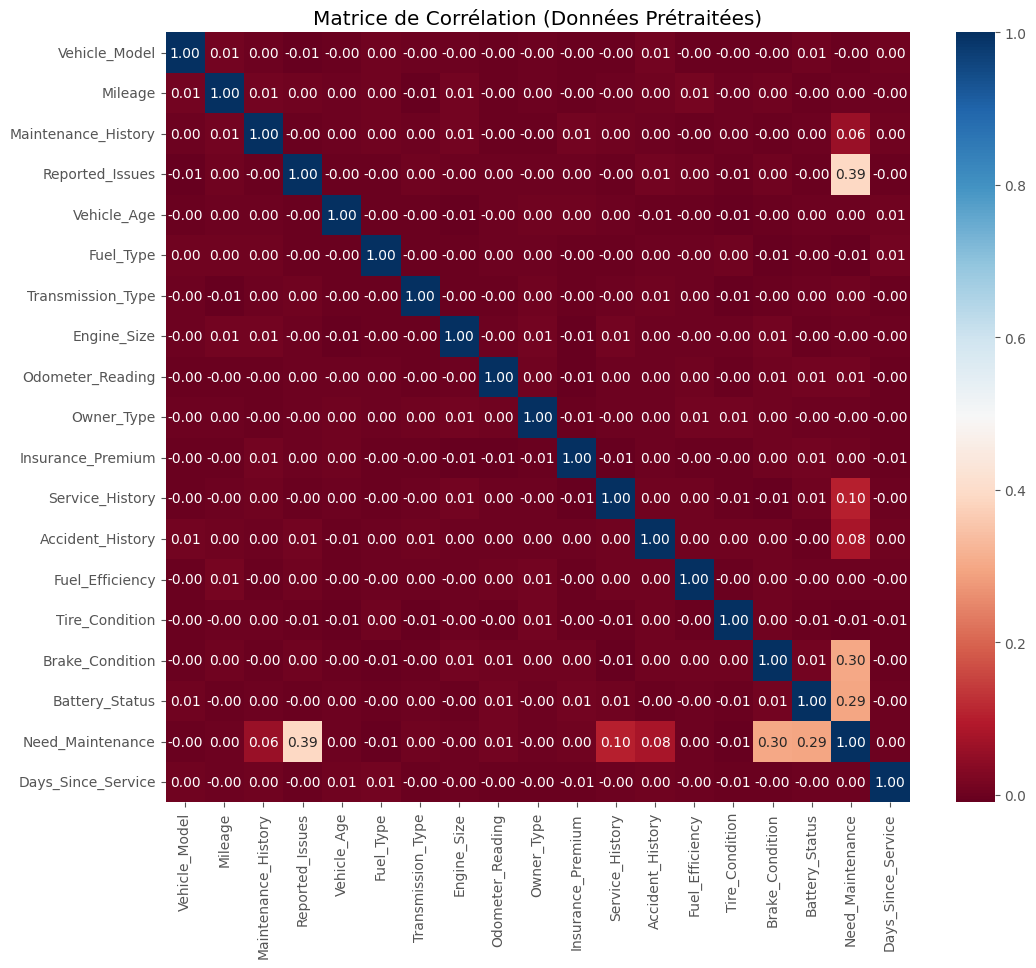

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Matrice de Corrélation (Données Prétraitées)')
plt.show()